In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
import textblob
from textblob import TextBlob,Word
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from spellchecker import SpellChecker

In [2]:
# importing the dataset

df=pd.read_csv(r'F:\Harsh\ML verzeo\Information.csv',engine='python')
df['description'].describe()

count                                                 16306
unique                                                15139
top       You can be spiritually empowered, financially ...
freq                                                     33
Name: description, dtype: object

# Performing EDA on the dataset

In [3]:
# taking the 2 categorical columns 'text' and 'description'
tweets = list(df['text'])
description=list(df['description'])
description

['i sing my own rhythm.',
 "I'm the author of novels filled with family drama and romance.",
 'louis whining and squealing and all',
 'Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.',
 'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx',
 "you don't know me.",
 'A global marketplace for images, videos and music. Sharing photos, inspiration, design tips & videos for the creative community.',
 'The secret of getting ahead is getting started.',
 'Pll Fan // Crazy about MCD // Ramen is bae',
 'Renaissance art historian, University of Nottingham; fuelled by Haribo, partial to coffee and with a soft spot for Renaissance China. National Teaching Fellow.',
 'Clean food that tastes great while providing energy & nutrients! No guilt granola, vegan/paleo friendly options too! Cert organic,

In [4]:
# cleaning the categorical data

for i in range(0,len(tweets)):  
    review=str(tweets[i])                           # converting to string, if escape nan error
    review=re.sub(r'@[a-zA-Z0-9]+',' ',review)      # removing the words having '@' in them
    review=re.sub(r'#[a-zA-Z0-9]+',' ',review)      # removing the words having '#' in them
    review=re.sub(r'https?:\/\/\S+',' ',review)     # removing any hyperlink in the text
    review=re.sub('[^a-zA-Z0-9\']',' ',review)      # removing any other arbitary symbols except alpha-numeric
    review = re.sub('\s+',' ',review)               # removing multiple spaces
    tweets[i]=review
for i in range(0,len(description)):  
    review=str(description[i])                      # converting to string, if escape nan error
    review=re.sub(r'@[a-zA-Z0-9]+',' ',review)      # removing the words having '@' in them
    review=re.sub(r'#[a-zA-Z0-9]+',' ',review)      # removing the words having '#' in them
    review=re.sub(r'https?:\/\/\S+',' ',review)     # removing any hyperlink in the text
    review=re.sub('[^a-zA-Z0-9\']',' ',review)      # removing any hyperlink in the text
    review = re.sub('\s+',' ',review)               # removing multiple spaces
    description[i]=review

In [5]:
# adding two columns for these cleaned text
df['text_norm'] = tweets
df['description_norm']=description

In [6]:
# printing the dataset
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text_norm,description_norm
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,Robbie E Responds To Critics After Win Against...,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),It felt like they were my friends and I was l...,I'm the author of novels filled with family dr...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),Hi Looking at the url do you use Don't typical...,Mobile guy 49ers Shazam Google Kleiner Perkins...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,Watching Neighbours on Sky catching up with th...,Ricky Wilson The Best FRONTMAN Kaiser Chiefs T...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ‰ªÁ,NaN,Fine and I'll drink tea too I love you,rp
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN,Greg Hardy you a good player and all but don't...,Whatever you like it's not a problem at all 9 ...
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN,You can miss people and still never want to se...,You look lost so you should follow me follow ...
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN,i had noticed your tendency to pee on the car...,Anti statist I homeschool my kids Aspiring tho...


In [7]:
# copying the dataset in df1 to remove outliers 
df1=df

# we remove the rows having gender="unknown"
# however we keep the rows having gender="brand" because we assume that there are many organizations 
# that also tweet on the twitter, which is important for the model to predict as separate entity
# and cannot be ignored
df1=df1[df1['gender']!='unknown']

### Data Visualization

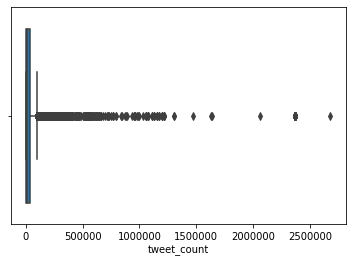

In [8]:
# plotting the boxplots for tweet_count
sb.boxplot(x=df1['tweet_count'])

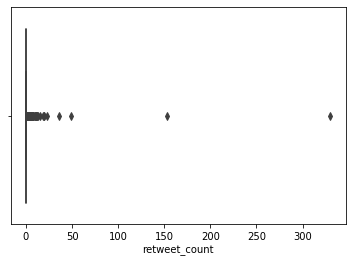

In [9]:
# plotting the boxplots for retweet_count
sb.boxplot(x=df1['retweet_count'])

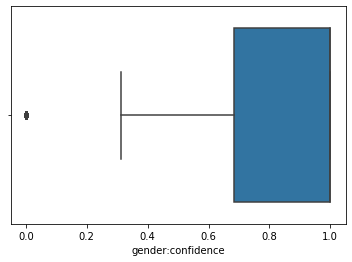

In [10]:
# plotting the boxplots for gender:confidence
sb.boxplot(x=df1['gender:confidence'])

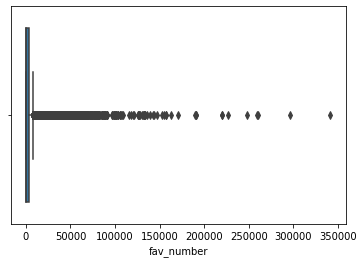

In [11]:
# plotting the boxplots for fav_number
sb.boxplot(x=df1['fav_number'])

In [12]:
# applying constraint on the columns based on observation from the above boxplots

df1=df1[df1['tweet_count']<=1300000]
df1=df1[df1['retweet_count']<=100]
df1=df1[df1['gender:confidence']>=0.6]
df1=df1[df1['fav_number']<=250000]

In [ ]:
# plotting the boxplots for tweet_count
sb.boxplot(x=df1['tweet_count'])

In [ ]:
# plotting the boxplots for retweet_count
sb.boxplot(x=df1['retweet_count'])

In [ ]:
# plotting the boxplots for gender:confidence
sb.boxplot(x=df1['gender:confidence'])

In [ ]:
# plotting the boxplots for fav_number
sb.boxplot(x=df1['fav_number'])

In [13]:
# printing the information of the cleaned dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18189 entries, 0 to 20049
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               18189 non-null  int64  
 1   _golden                18189 non-null  bool   
 2   _unit_state            18189 non-null  object 
 3   _trusted_judgments     18189 non-null  int64  
 4   _last_judgment_at      18142 non-null  object 
 5   gender                 18189 non-null  object 
 6   gender:confidence      18189 non-null  float64
 7   profile_yn             18189 non-null  object 
 8   profile_yn:confidence  18189 non-null  float64
 9   created                18189 non-null  object 
 10  description            14998 non-null  object 
 11  fav_number             18189 non-null  int64  
 12  gender_gold            47 non-null     object 
 13  link_color             18189 non-null  object 
 14  name                   18189 non-null  object 
 15  pr

In [14]:
# to check if any more outlier or unexpected value (if there)
df1.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,1.818900e+04,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,1.818900e+04,1.818900e+04
mean,8.157294e+08,3.638793,0.919526,0.996019,4293.357634,0.057122,3.513866e+04,6.587350e+17
std,6.006508e+03,12.568849,0.142437,0.036306,11802.625636,0.671764,7.654538e+04,5.000095e+12
min,8.157192e+08,3.000000,0.605900,0.631000,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,1.000000,1.000000,13.000000,0.000000,2.384000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,471.000000,0.000000,1.119700e+04,6.587400e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3316.000000,0.000000,3.966700e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,248255.000000,49.000000,1.213665e+06,6.587400e+17


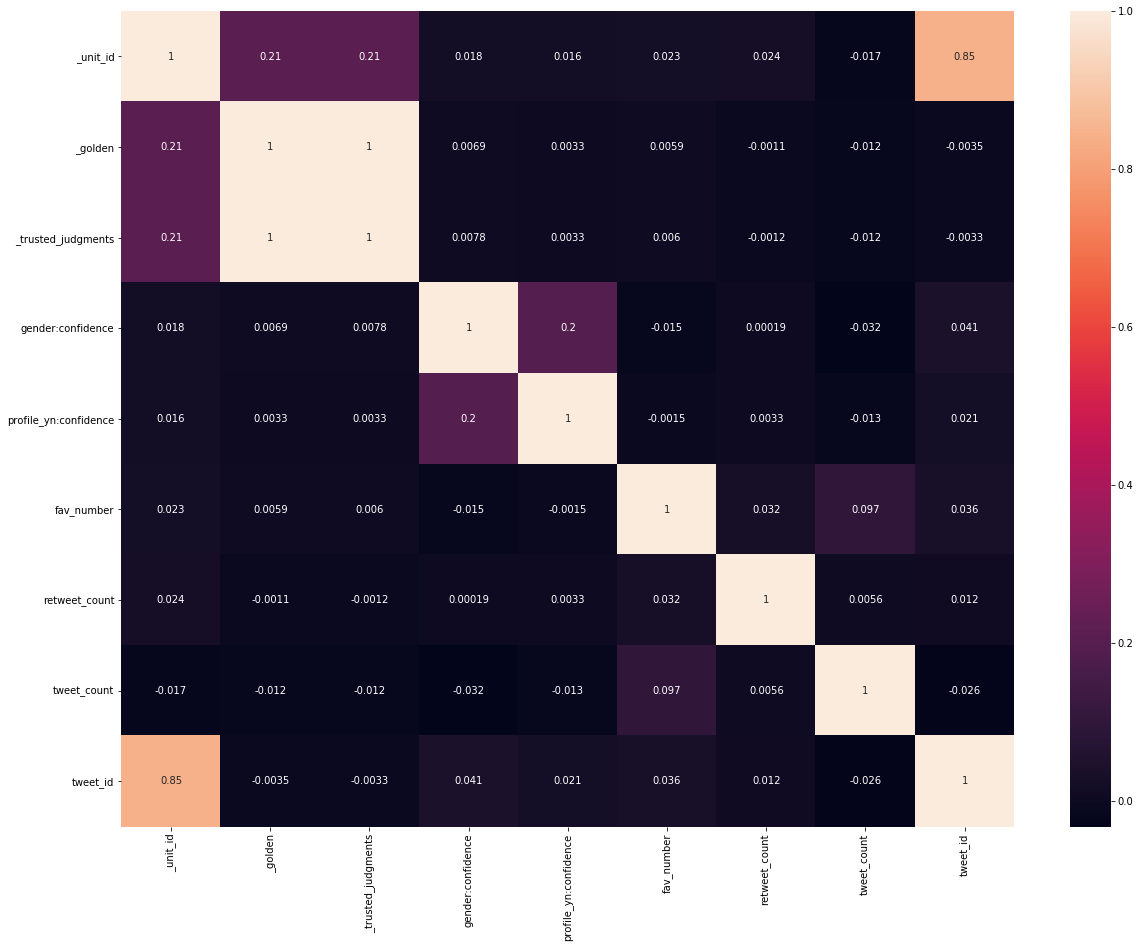

In [15]:
# printing the heat map to see the correlation between the various columns of our dataset


plt.subplots(figsize=(20,15))
sb.heatmap(df1.corr(), annot=True)

# MODELS

In [16]:
# importing the countvectorizer() 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

# we give the combined string of text and description to the count vectorizer object
df1['all_features'] = df1['text_norm'].str.cat(df1['description_norm'], sep=' ')
x=cv.fit_transform(df1['all_features'])
# we get a sparse matrix in return 
type(x)

scipy.sparse.csr.csr_matrix

In [17]:
# preparing our Y dataset
# we apply label encoding in the gender column because it has categorical data

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

y = encoder.fit_transform(df1['gender'])

In [18]:
# dimension of our sparse matrix
# here rows are same as of given dataset
# there are 36833 columns in the matrix for different words 
x.shape

(18189, 36833)

In [19]:
# we split our dataset into training and testing set
# here we keep test_size as 0.2

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
type(x_train)

scipy.sparse.csr.csr_matrix

# Logisitic Regression

In [21]:
# importing the library
from sklearn.linear_model import LogisticRegression

# creating the object
classifier=LogisticRegression()

# fitting our classifier
classifier.fit(x_train,y_train)

# finding the accuracy of our training model
classifier.score(x_test,y_test)

C:\Users\Harsh Bansal\Anaconda3\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6201209455744915

In [ ]:
# here we could have performed feature scaling but in this it was not required
# also it reduced the final accuracy

'''from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)'''

# Decison Tree Classifier

In [22]:
# importing the library and fitting the data and obtaining its accuracy score
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.5305112699285321

# Random Forest Classifier

In [23]:
# importing the library and fitting the data and obtaining its accuracy score

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.6063771302913689

# KNN classification

In [24]:
# importing the library and fitting the data and obtaining its accuracy score

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.45519516217702033

# SVM

In [25]:
# importing the library and fitting the data and obtaining its accuracy score

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.5898845519516218

# Ensemble Learning using Voting Classifier

In [26]:
# importing the library and fitting the data and obtaining its accuracy score

# here we give three algorithm to our voting classifier:
    #Logitic Regression
    #Random Forest
    #SVM
# because these 3 were the one to give better results
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 =SVC(kernel='linear')
vc = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
vc.fit(x_train,y_train)
vc.score(x_test,y_test)

0.6154480483782298

### So based on the above accuracy score we can say that Logistic Regression gives the best accuracy of around 

### 0.6201209455744915.

### Followed by the voting classifier which gives

### 0.6154480483782298


# Question 

## Q1) What are the most common emotions/words used by Males and Females?

In [27]:
# we make a df male which contains all the rows that correspond the gender=Male
male = df1[df1["gender"] == 'male']

In [28]:
# Here we choose all the normalized text column in male message
male_message=male['text_norm']

In [29]:
# we create a list that contains a list of text that does not contain stopwords
male_corpus=[]
for message in male_message:
    message = re.sub('[^a-zA-Z]',' ',message)   # we also remove apostrophies, and numerical values
    message=message.lower()
    message=message.split()
    message=[word for word in message if not word in set(stopwords.words('english'))]  # its removes the stopwords
    message=' '.join(message)
    male_corpus.append(message)

In [30]:
# printing the male_corpus lsit
male_corpus

['robbie e responds critics win eddie edwards',
 'felt like friends living story',
 'absolutely adore louis starts songs hits hard feels good',
 'hi looking url use typically see advanced user',
 'gala bingo clubs bought uk largest high street bingo operator gala taken',
 'ditto still learning favourites retweet stuff least sucks less facebook haha p',
 'understand get server get',
 'yall lmfaoo right chorus came tear rolled face',
 'james bond premier night oxted let hope lives expectation',
 'hath fury based real',
 'got yards points jets gave season',
 'alot past ion wont back',
 'mean like mainstream new media supposed feed fact nowadays',
 'many followers get everyday got last day growing daily',
 'mheshimiwa travellers along stretch road lubao r hurting nobody seems raising issue',
 'greenville thursday yall holla need anything know plug',
 'cardiff drew match goals sounds good',
 'gala bingo clubs bought uk largest high street bingo operator gala taken',
 'best thing audition we

In [31]:
# now we create a dictionary that contains the words and their corresponding frequencies
male_words={}
for i in range(0,len(male_corpus)):
    text = male_corpus[i].split(' ')
    for word in text:
        if word in male_words:
            male_words[word]+=1    # if words is already there then increase the frequency count by 1
        else:
            male_words.update({word:1})     # else create a key for that word and initialize frequency by 1

In [32]:
# create a dataframe for the above dictionary
male_all_words = pd.Series(male_words)

In [33]:
# we sort the dataframe in descending value to find the most frequent words
male_all_words.sort_values(ascending=False)

like        341
get         334
one         253
time        224
new         208
           ... 
fdr           1
grimshaw      1
posting       1
crafts        1
robbie        1
Length: 11774, dtype: int64

In [34]:
# we make a df male which contains all the rows that correspond the gender=Female
female = df1[df1["gender"] == 'female']

In [35]:
# Here we choose all the normalized text column in female message
female_message=female['text_norm']

In [36]:
# we create a list that contains a list of text that does not contain stopwords
female_corpus=[]
for message in female_message:
    message = re.sub('[^a-zA-Z]',' ',message)  # we also remove apostrophies, and numerical values
    message=message.lower()
    message=message.split()
    message=[word for word in message if not word in set(stopwords.words('english'))]  # its removes the stopwords
    message=' '.join(message)
    female_corpus.append(message)

In [37]:
# now we create a dictionary that contains the words and their corresponding frequencies
female_words={}
for i in range(0,len(female_corpus)):
    text = female_corpus[i].split(' ')
    for word in text:
        if word in female_words:
            female_words[word]+=1    # if words is already there then increase the frequency count by 1
        else:
            female_words.update({word:1})    # else create a key for that word and initialize frequency by 1

In [38]:
# we create a dataframe for the above obtained dictionary
female_all_words = pd.Series(female_words)

In [39]:
# we arrange the dataframe in descending order to find the most common words
female_all_words.sort_values(ascending=False)

like         443
get          346
one          325
love         316
day          291
            ... 
pilates        1
tacos          1
skeletons      1
dumbasses      1
nodded         1
Length: 11115, dtype: int64

#### The answer to this question is:
#### By Males: like (341), get (334), one (253), time (224)
#### By Females: like (443), get (346), one (325), love (316)
#### Hence for male and female category "like" is the most common word

## Question 2

## Q2) Which gender makes more typos in their tweets?

In [ ]:
# first we create an object for SpellChecker

spell=SpellChecker()

# function to find the typos in each row
def correctioncount(text):
    message=text.split()              # splitting the string into words
    count=0                           #initializing the count for typos 
    for word in message:
        if word==spell.correction(word):   # if word is correct then do nothing
            continue
        else:
            count+=1                  # if spelling is wrong then increment the count by 1 
    return count                      # return the number of typos for each row
df1['typo_count']=df1['text_norm'].apply(correctioncount)   # applying the function for each rows of the dataset
df1                                                          #and recording its output in separate columns

In [ ]:
# we again create male and female dataset separately

male = df1[df1["gender"] == 'male']
female = df1[df1["gender"] == 'female']

In [ ]:
# we find the count of the typos for male gender

male_typos=male['typo_count']
male_typos.sum(axis=0)

In [ ]:
# similarly we find the count of the typos for male gender
female_typos=female['typo_count']
female_typos.sum(axis=0)

### From the above result it is clear that male makes more typos than the females